In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Convention

The matrix X will be of shape (n, d) where n is the number of observations and the d is the number of features

In [15]:
class Mutation:

    @staticmethod
    def gaussian(X: np.ndarray, sigma: float = 0.1, p: float = 0.2) -> np.ndarray:
        """
        Apply gaussian mutation to the input matrix X with a given probability p
        """
        mask = (np.random.random(X.shape) < p) * 1
        noise = np.random.normal(0, sigma, X.shape)
        return X + mask * noise

    @staticmethod
    def flip(X: np.ndarray, p: float = 0.2) -> np.ndarray:
        """
        Apply flip mutation to the input matrix X with a given probability p
        """
        mask = (np.random.random(X.shape) < p) * 1
        return (1 - mask) * X + mask * (1 - X)

In [3]:
class Crossover:

    @staticmethod
    def get_parents(population: np.ndarray, crossover_p: float = 0.7) -> tuple[np.ndarray, np.ndarray]:
        """
        Split the population into two groups of parents
        """
        prob_vector = np.random.random(population.shape[0])
        reproductive_population = population[prob_vector < crossover_p]
        idx = np.arange(reproductive_population.shape[0])
        np.random.shuffle(idx)
        reproductive_population = reproductive_population[idx]

        split_idx = reproductive_population.shape[0] // 2

        return reproductive_population[:split_idx], reproductive_population[split_idx:(2*split_idx)]

    @staticmethod
    def pointwise(parents1: np.ndarray, parents2: np.ndarray, split_portion: float = 0.5) -> np.ndarray:
        """
        Apply pointwise crossover to the input matrices parent1 and parent2 with a given probability p
        """
        assert parents1.shape == parents2.shape
        split_point = int(parents1.shape[1] * split_portion)
        return np.concatenate([parents1[:, :split_point], parents2[:, split_point:]], axis=1)

    @staticmethod
    def mean(parents1: np.ndarray, parents2: np.ndarray) -> np.ndarray:
        """
        Apply mean crossover to the input matrices parent1 and parent2 with a given probability p
        """
        assert parents1.shape == parents2.shape
        return (parents1 + parents2) / 2


In [4]:
class Selection:

    @staticmethod
    def roulette(population: np.ndarray, fitness: np.ndarray, n: int = 1) -> np.ndarray:
        """
        Apply roulette selection to the input population. Select n individuals based on their fitness
        """
        total_fitness = np.sum(fitness)
        probabilities = fitness / total_fitness
        idx = np.random.choice(population.shape[0], n, p=probabilities)
        return population[idx]

    @staticmethod
    def fittest(population: np.ndarray, fitness: np.ndarray, n: int = 1) -> np.ndarray:
        """
        Apply fittest selection to the input population. Select the n fittest individuals
        """
        idx = np.argsort(fitness)[::-1][:n]
        return population[idx]

# Function testing

In [5]:
def simple_parabolid(X):
    return X[:, 0] ** 2 + X[:, 1] ** 2 + 2 * (X[:, 2] ** 2)

In [9]:
TIMESTEPS = 50
N = 100
D = 3
f = lambda x: -simple_parabolid(x)


population = np.random.random((N, D))

scores = []
for t in range(TIMESTEPS):

    parents1, parents2 = Crossover.get_parents(population)
    children = Crossover.pointwise(parents1, parents2)
    mutated_children = Mutation.gaussian(children)
    new_population = np.concatenate([population, mutated_children], axis=0)

    fitness = f(new_population)
    max_fitness = np.max(fitness)
    print(f"Generation {t}: {max_fitness}")
    scores.append(max_fitness)

    population = Selection.fittest(new_population, fitness, N)


Generation 0: -0.06534414553822687
Generation 1: -0.06534414553822687
Generation 2: -0.06534414553822687
Generation 3: -0.06534414553822687
Generation 4: -0.05727465767565669
Generation 5: -0.05638713727327342
Generation 6: -0.006750929830749732
Generation 7: -0.006750929830749732
Generation 8: -0.00496011182464408
Generation 9: -0.00496011182464408
Generation 10: -0.00496011182464408
Generation 11: -0.00496011182464408
Generation 12: -0.00496011182464408
Generation 13: -0.0007189222079671683
Generation 14: -0.0007189222079671683
Generation 15: -0.0007189222079671683
Generation 16: -0.0007189222079671683
Generation 17: -0.0007189222079671683
Generation 18: -0.0007189222079671683
Generation 19: -0.0007189222079671683
Generation 20: -0.0007189222079671683
Generation 21: -0.0007189222079671683
Generation 22: -0.0007189222079671683
Generation 23: -0.0007189222079671683
Generation 24: -0.000428245038795352
Generation 25: -0.000428245038795352
Generation 26: -0.000428245038795352
Generation 

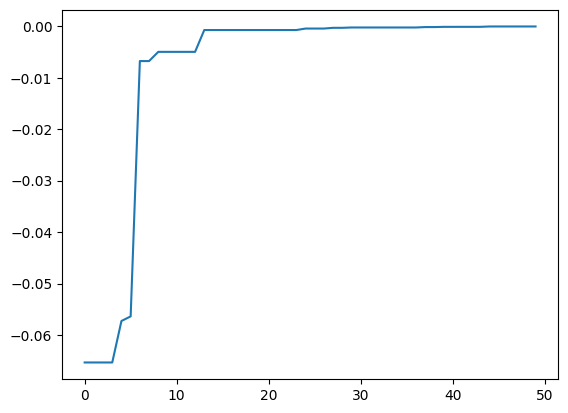

In [10]:
plt.plot(scores)

## Restiring function

In [11]:
import math
def rastrigin(X):
    A = 10
    return A * X.shape[1] + np.sum(X ** 2 - A * np.cos(2 * math.pi * X), axis=1)

In [16]:
TIMESTEPS = 20
N = 10
D = 5
f = rastrigin


population = (np.random.random(size=(N, D))  - 0.5) * 10

scores = []
for t in range(TIMESTEPS):

    parents1, parents2 = Crossover.get_parents(population)
    children = Crossover.pointwise(parents1, parents2)
    mutated_children = Mutation.gaussian(children)
    new_population = np.concatenate([population, mutated_children], axis=0)

    fitness = f(new_population)
    max_fitness = np.max(fitness)
    print(f"Generation {t}: {max_fitness}")
    scores.append(max_fitness)

    population = Selection.fittest(new_population, fitness, N)


Generation 0: 131.33242156743623
Generation 1: 131.33242156743623
Generation 2: 131.33242156743623
Generation 3: 131.33242156743623
Generation 4: 131.33242156743623
Generation 5: 143.68845198921707
Generation 6: 144.3022131172935
Generation 7: 144.3022131172935
Generation 8: 144.3022131172935
Generation 9: 144.3022131172935
Generation 10: 144.5221027821375
Generation 11: 144.5221027821375
Generation 12: 146.01028079330268
Generation 13: 146.51771432665004
Generation 14: 146.51771432665004
Generation 15: 146.51771432665004
Generation 16: 146.51771432665004
Generation 17: 146.51771432665004
Generation 18: 149.6503334279999
Generation 19: 150.15309106688537


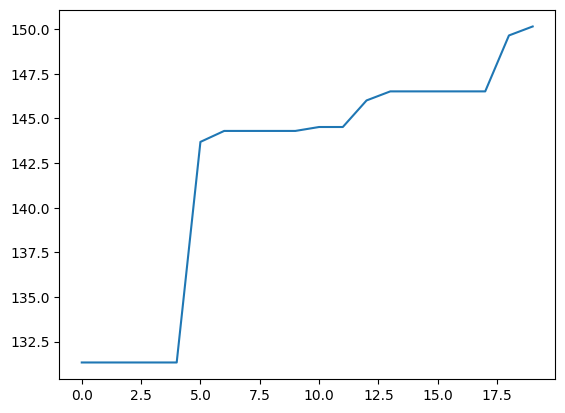

In [17]:
plt.plot(scores)